<a href="https://colab.research.google.com/github/Z5-05/study/blob/Var2/ml/Mephi_ML7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo
!!pip3 install optuna

['Requirement already satisfied: optuna in /usr/local/lib/python3.10/dist-packages (3.5.0)',
 'Requirement already satisfied: alembic>=1.5.0 in /usr/local/lib/python3.10/dist-packages (from optuna) (1.13.1)',
 'Requirement already satisfied: colorlog in /usr/local/lib/python3.10/dist-packages (from optuna) (6.8.0)',
 'Requirement already satisfied: numpy in /usr/local/lib/python3.10/dist-packages (from optuna) (1.23.5)',
 'Requirement already satisfied: packaging>=20.0 in /usr/local/lib/python3.10/dist-packages (from optuna) (23.2)',
 'Requirement already satisfied: sqlalchemy>=1.3.0 in /usr/local/lib/python3.10/dist-packages (from optuna) (2.0.23)',
 'Requirement already satisfied: tqdm in /usr/local/lib/python3.10/dist-packages (from optuna) (4.66.1)',
 'Requirement already satisfied: PyYAML in /usr/local/lib/python3.10/dist-packages (from optuna) (6.0.1)',
 'Requirement already satisfied: Mako in /usr/local/lib/python3.10/dist-packages (from alembic>=1.5.0->optuna) (1.3.0)',
 'Requi

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

In [ ]:
import re
import requests
import json
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import sparse
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")
import optuna

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import StackingClassifier
from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [ ]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


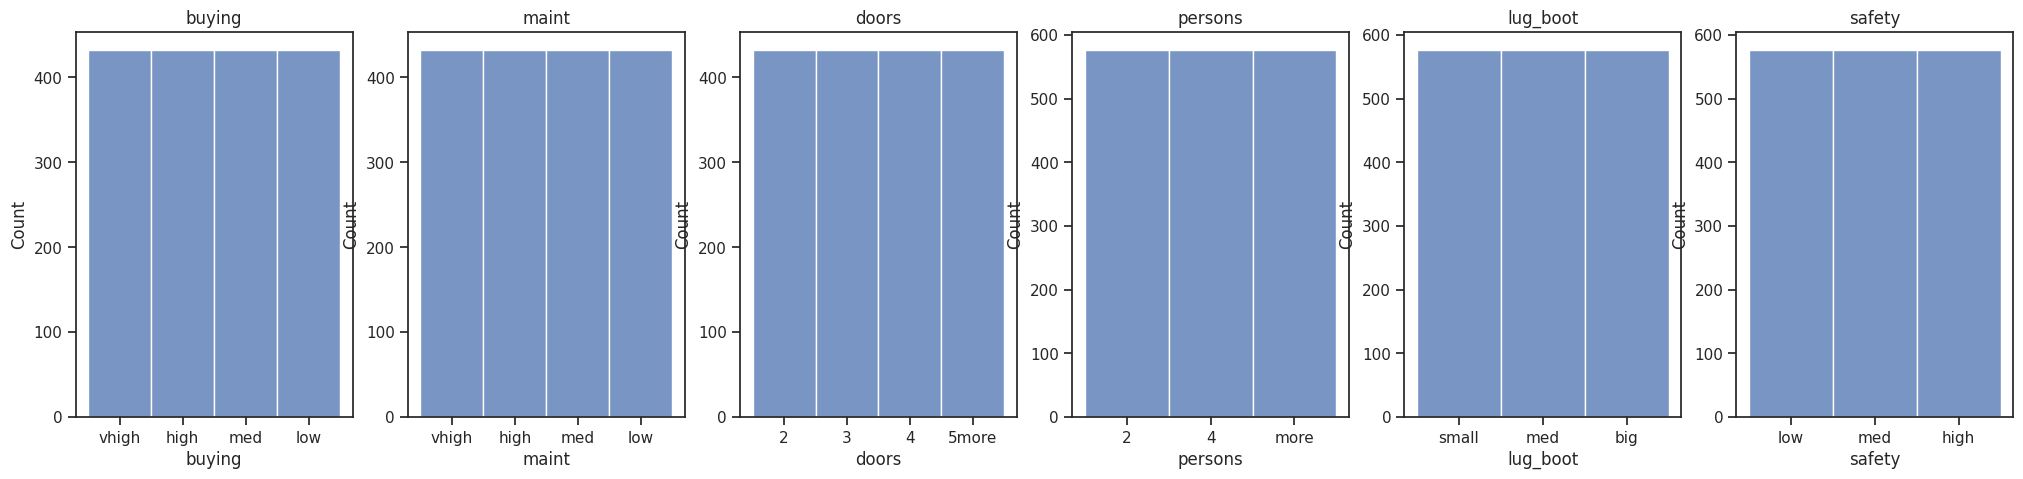

In [ ]:
fig, axes = plt.subplots(1, len(X.columns), figsize=(25, 5))

for ax, col in zip(axes, X.columns):
  sns.histplot(data=X, x=col, ax=ax)
  ax.set_title(col)

plt.show()

In [ ]:
X_labeled = X.apply(LabelEncoder().fit_transform).astype(float)
y_labeled = LabelEncoder().fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.3, random_state=42)
X_train.shape[0], X_test.shape[0]

(1209, 519)

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(f"F-score = {f1_score(y_test, y_pred, average='weighted')}")

F-score = 0.9177712305850013


In [ ]:
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500)
    }

    # Fit the model
    optuna_model = GradientBoostingClassifier(**params)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    f_score = f1_score(y_test, y_pred, average='weighted')
    return f_score

In [ ]:
study = optuna.create_study(direction='maximize')

[I 2023-12-24 09:52:07,541] A new study created in memory with name: no-name-9033ee2c-0aaa-4d39-9759-4a50941f5dc1


In [ ]:
study.optimize(objective, n_trials=10)

[I 2023-12-24 09:52:08,928] Trial 0 finished with value: 0.9792737200164888 and parameters: {'max_depth': 2, 'learning_rate': 0.14292352909958356, 'n_estimators': 288}. Best is trial 0 with value: 0.9792737200164888.
[I 2023-12-24 09:52:11,715] Trial 1 finished with value: 0.9815346926403378 and parameters: {'max_depth': 6, 'learning_rate': 0.14526326777835558, 'n_estimators': 238}. Best is trial 1 with value: 0.9815346926403378.
[I 2023-12-24 09:52:12,819] Trial 2 finished with value: 0.9138154544631781 and parameters: {'max_depth': 4, 'learning_rate': 0.01842431406669201, 'n_estimators': 105}. Best is trial 1 with value: 0.9815346926403378.
[I 2023-12-24 09:52:15,822] Trial 3 finished with value: 0.9867540865318116 and parameters: {'max_depth': 3, 'learning_rate': 0.127601104865701, 'n_estimators': 344}. Best is trial 3 with value: 0.9867540865318116.
[I 2023-12-24 09:52:18,849] Trial 4 finished with value: 0.9651773453590329 and parameters: {'max_depth': 7, 'learning_rate': 0.015298

In [ ]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 10
Best trial:
  Value: 0.9867781550126895
  Params: 
    max_depth: 5
    learning_rate: 0.7842607578593377
    n_estimators: 394
